# Predictive Maintenance for Trucks
## Project Goal
This notebook aims to analyze historical data from a fleet of trucks to predict the probability of mechanical failure. By doing so, we can move from a reactive to a proactive maintenance strategy, reducing costs and increasing fleet reliability.

## Notebook Outline
1.  **Data Loading and Initial Exploration:** Load the datasets and perform a preliminary analysis.
2.  **Exploratory Data Analysis (EDA):** Dive deeper into the data to uncover patterns and insights.
3.  **Data Preprocessing and Feature Engineering:** Prepare the data for machine learning.
4.  **Model Training:** Train and evaluate several machine learning models.
5.  **Prediction:** Use the best model to make predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### 1. Data Loading and Initial Exploration

In [2]:
vehicle_info_df = pd.read_csv('sample_data/vehicle_info.csv')
maintenance_logs_df = pd.read_csv('sample_data/maintenance_logs.csv')
sensor_data_df = pd.read_csv('sample_data/sensor_data.csv')
driver_behavior_df = pd.read_csv('sample_data/driver_behavior.csv')

The four datasets generated previously have been loaded into pandas DataFrames.

In [3]:
print("Vehicle Information:")
display(vehicle_info_df.head())
print("Maintenance Logs:")
display(maintenance_logs_df.head())
print("Sensor Data:")
display(sensor_data_df.head())
print("Driver Behavior:")
display(driver_behavior_df.head())

Vehicle Information:


,truck_id,model,year,total_mileage
0,TRUCK_000,Model B,2018,165640
1,TRUCK_001,Model C,2016,356348
2,TRUCK_002,Model A,2017,201176
3,TRUCK_003,Model B,2011,265043
4,TRUCK_004,Model C,2017,482765


Maintenance Logs:


,maintenance_id,truck_id,maintenance_date,part_replaced,reason
0,d9f1235e-7a82-4581-9a73-5bb96016096c,TRUCK_008,2023-06-07 18:47:35.741715,Brakes,Wear and Tear
1,be130bef-3af4-49e8-bc9f-32b3e22b86eb,TRUCK_031,2023-02-16 06:43:46.494020,Battery,Wear and Tear
2,f6b51e25-409a-44ee-b406-c967356f0c4b,TRUCK_015,2024-10-20 14:04:24.374441,Battery,Scheduled Maintenance
3,49251338-bd53-4a13-ba39-fc675d44e787,TRUCK_025,2021-05-02 14:10:22.615690,Brakes,Failure
4,0eb54b66-e4ff-49b3-b21e-90f0b842bb54,TRUCK_048,2024-10-24 19:32:44.434268,Tires,Scheduled Maintenance


Sensor Data:


,reading_id,truck_id,timestamp,engine_temp,oil_pressure,tire_pressure,vibration
0,9d2a27ec-eddf-4688-bcd2-e99a34ec0e65,TRUCK_032,2023-05-24 08:27:09.889535,85.644140,50.327642,95.669696,1.921885
1,7dd51cdd-5985-4d87-addb-d51fa4816bde,TRUCK_041,2022-10-30 18:20:21.761083,94.163575,40.622012,118.396003,2.175023
2,f460090f-d968-4ee0-bdee-5197651cb16e,TRUCK_004,2022-05-14 17:11:54.210421,96.994428,59.731670,110.540906,1.278898
3,5716544f-472b-4160-84bb-7152060d10d1,TRUCK_027,2022-11-12 00:33:06.078591,100.339023,47.251449,98.169335,1.744959
4,8854d869-3269-4208-92d9-578e1ad138ce,TRUCK_036,2021-05-07 11:26:40.615078,94.003745,78.015814,114.732047,0.905843


Driver Behavior:


,behavior_id,truck_id,timestamp,event,severity
0,4d041a3b-2fd8-462f-b882-0603d8ba69a1,TRUCK_006,2021-08-12 12:12:42.018538,Harsh Acceleration,0.893923
1,110b49ce-a524-42c7-b129-7230ca168c11,TRUCK_006,2021-06-29 16:38:59.770577,Harsh Acceleration,0.462634
2,bae50a32-d0fa-48c7-8d7c-a7a483e3c18e,TRUCK_026,2020-11-09 01:37:05.662472,Speeding,0.698533
3,58f85d45-49e9-410e-abc3-35c9a67be776,TRUCK_026,2025-05-15 18:28:54.565619,Harsh Acceleration,0.452707
4,35aaaa63-c27a-4808-abff-1e0c4e20bc2a,TRUCK_019,2023-08-23 00:12:15.040665,Harsh Acceleration,0.624004


A quick look at the first few rows of each DataFrame to ensure they are loaded correctly.

In [4]:
print("Vehicle Information Info:")
vehicle_info_df.info()
print("Maintenance Logs Info:")
maintenance_logs_df.info()
print("Sensor Data Info:")
sensor_data_df.info()
print("Driver Behavior Info:")
driver_behavior_df.info()

Vehicle Information Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   truck_id       50 non-null     object
 1   model          50 non-null     object
 2   year           50 non-null     int64 
 3   total_mileage  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
Maintenance Logs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   maintenance_id    500 non-null    object
 1   truck_id          500 non-null    object
 2   maintenance_date  500 non-null    object
 3   part_replaced     500 non-null    object
 4   reason            500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB
Sensor Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 

Displaying the summary of each DataFrame, including the data types and non-null counts for each column.

In [5]:
print("Vehicle Information Stats:")
display(vehicle_info_df.describe())
print("Maintenance Logs Stats:")
display(maintenance_logs_df.describe())
print("Sensor Data Stats:")
display(sensor_data_df.describe())
print("Driver Behavior Stats:")
display(driver_behavior_df.describe())

Vehicle Information Stats:


,year,total_mileage
count,50.000000,50.000000
mean,2016.700000,280916.820000
std,3.980821,131569.592155
min,2010.000000,50210.000000
25%,2013.000000,178320.250000
50%,2017.000000,263857.000000
75%,2020.000000,395851.500000
max,2023.000000,488843.000000


Maintenance Logs Stats:


,maintenance_id,truck_id,maintenance_date,part_replaced,reason
count,500,500,500,500,500
unique,500,50,500,5,3
top,d9f1235e-7a82-4581-9a73-5bb96016096c,TRUCK_034,2023-06-07 18:47:35.741715,Battery,Wear and Tear
freq,1,18,1,111,172


Sensor Data Stats:


,engine_temp,oil_pressure,tire_pressure,vibration
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,94.982215,59.967194,105.035382,1.312331
std,5.806766,11.595627,8.661469,0.690041
min,85.000484,40.002436,90.001016,0.100101
25%,89.913784,49.940039,97.561266,0.717812
50%,94.970713,60.027846,105.086229,1.318311
75%,100.050219,69.935488,112.508221,1.909599
max,104.998854,79.999480,119.998618,2.499968


Driver Behavior Stats:


,severity
count,5000.000000
mean,0.555073
std,0.259287
min,0.100049
25%,0.330126
50%,0.556930
75%,0.783394
max,0.999535


Descriptive statistics for the numerical columns in each DataFrame.

### 2. Exploratory Data Analysis (EDA)

#### Vehicle Information Analysis

/var/folders/g4/m7f0dmtn3db6bxvvv3_fzxx40000gn/T/ipykernel_41972/2299326103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='model', data=vehicle_info_df, palette='viridis')


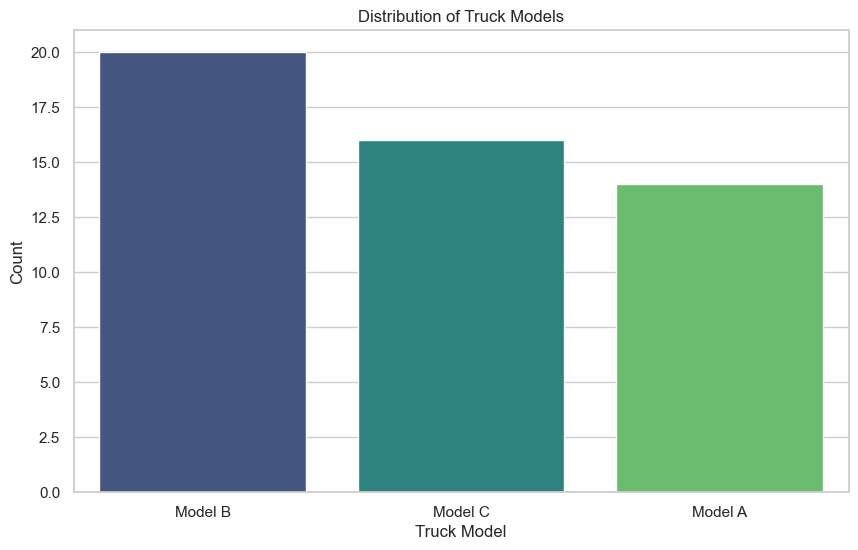

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='model', data=vehicle_info_df, palette='viridis')
plt.title('Distribution of Truck Models')
plt.xlabel('Truck Model')
plt.ylabel('Count')
plt.show()

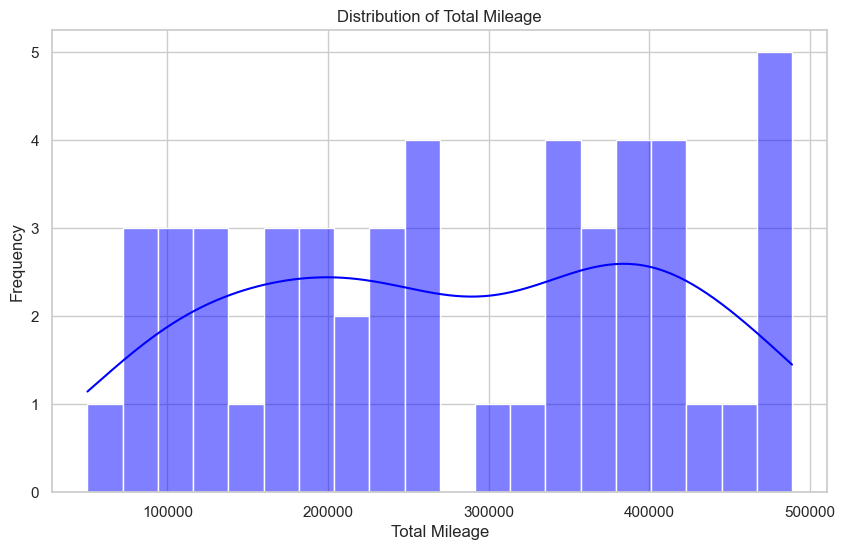

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(vehicle_info_df['total_mileage'], kde=True, bins=20, color='blue')
plt.title('Distribution of Total Mileage')
plt.xlabel('Total Mileage')
plt.ylabel('Frequency')
plt.show()

#### Maintenance Log Analysis

/var/folders/g4/m7f0dmtn3db6bxvvv3_fzxx40000gn/T/ipykernel_41972/1001286221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='reason', data=maintenance_logs_df, palette='plasma', order = maintenance_logs_df['reason'].value_counts().index)


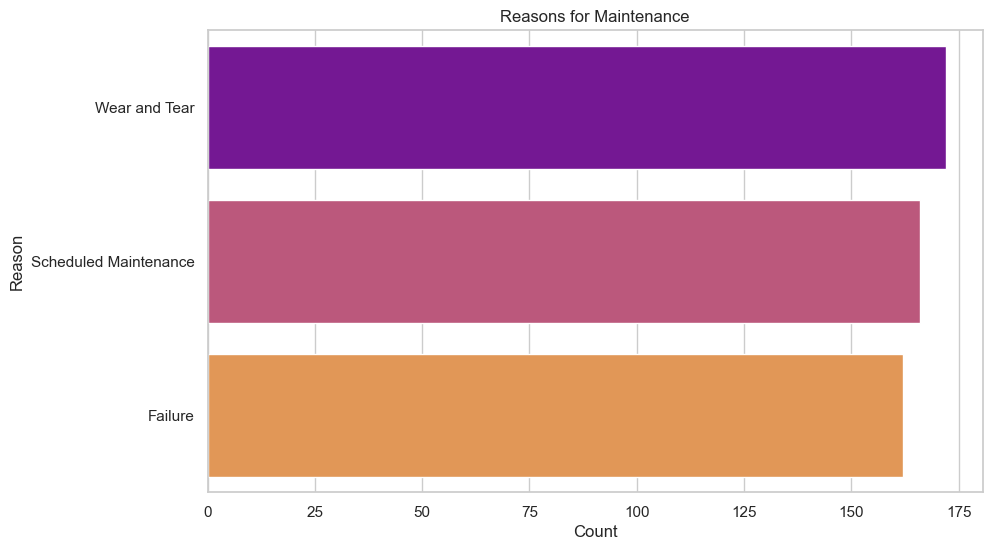

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='reason', data=maintenance_logs_df, palette='plasma', order = maintenance_logs_df['reason'].value_counts().index)
plt.title('Reasons for Maintenance')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

/var/folders/g4/m7f0dmtn3db6bxvvv3_fzxx40000gn/T/ipykernel_41972/843471635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='part_replaced', data=maintenance_logs_df, palette='magma', order = maintenance_logs_df['part_replaced'].value_counts().index)


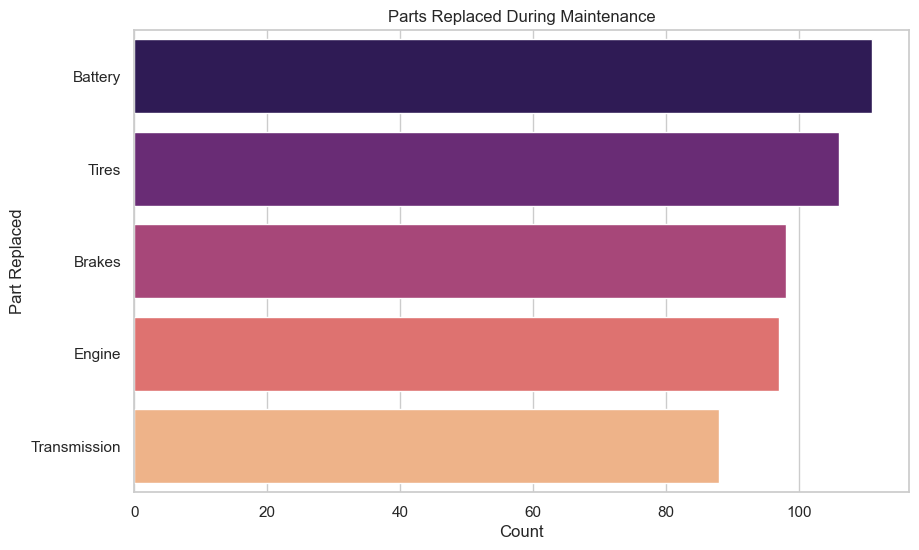

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='part_replaced', data=maintenance_logs_df, palette='magma', order = maintenance_logs_df['part_replaced'].value_counts().index)
plt.title('Parts Replaced During Maintenance')
plt.xlabel('Count')
plt.ylabel('Part Replaced')
plt.show()

#### Sensor Data Analysis

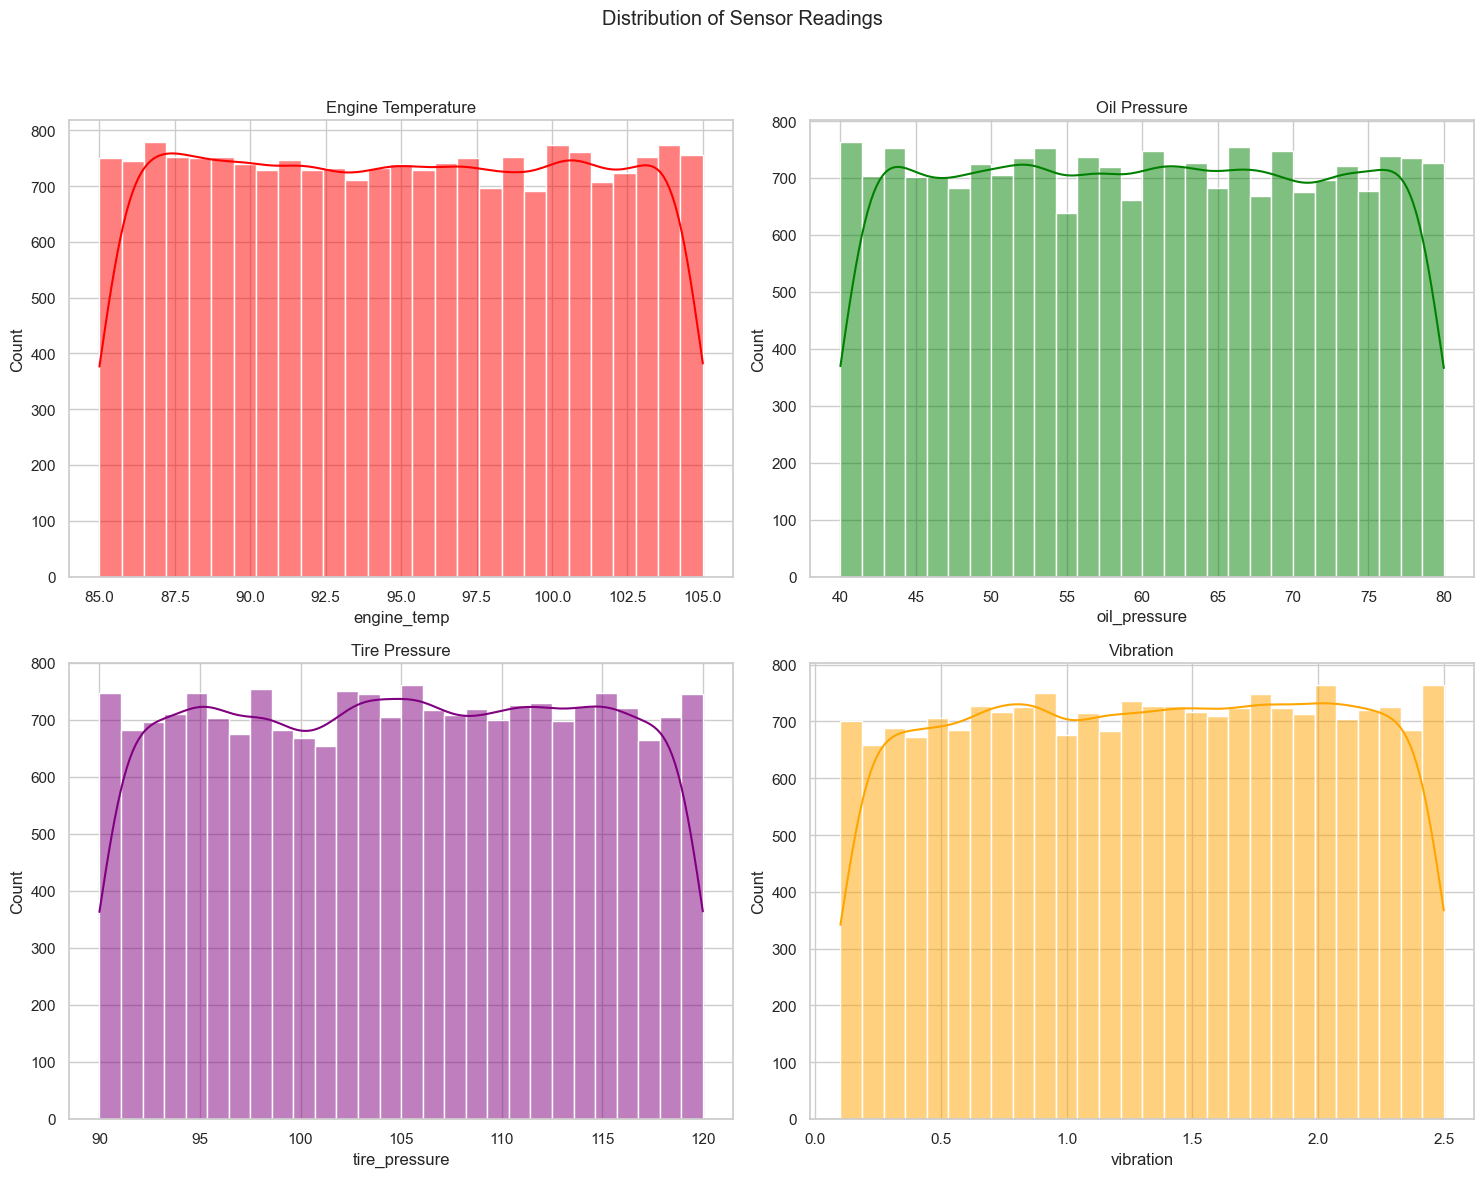

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Sensor Readings')

sns.histplot(sensor_data_df['engine_temp'], kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Engine Temperature')

sns.histplot(sensor_data_df['oil_pressure'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Oil Pressure')

sns.histplot(sensor_data_df['tire_pressure'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Tire Pressure')

sns.histplot(sensor_data_df['vibration'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Vibration')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Driver Behavior Analysis

/var/folders/g4/m7f0dmtn3db6bxvvv3_fzxx40000gn/T/ipykernel_41972/969429935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event', data=driver_behavior_df, palette='coolwarm')


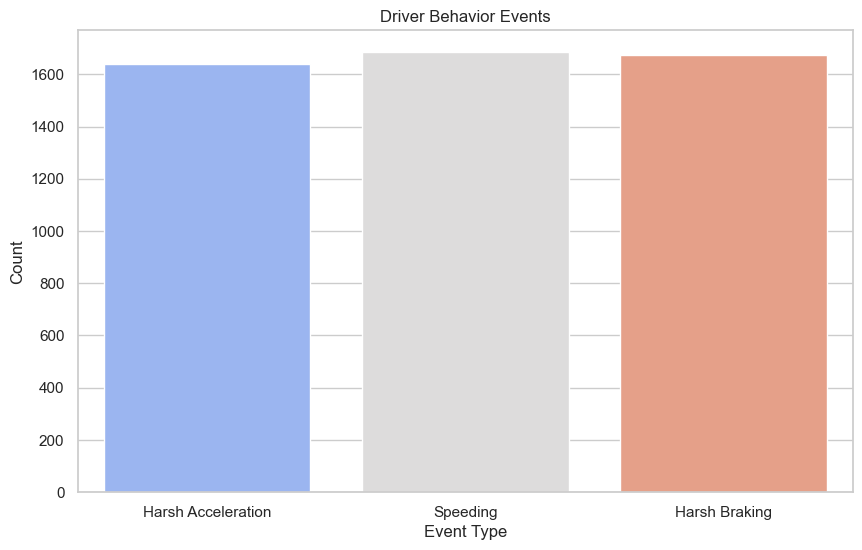

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='event', data=driver_behavior_df, palette='coolwarm')
plt.title('Driver Behavior Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

### Initial EDA Findings
- The distribution of truck models is fairly even.
- Total mileage has a wide distribution, with some trucks having significantly higher mileage.
- The most common reason for maintenance is "Failure", which highlights the importance of this project.
- Engine, Tires, and Brakes are the most frequently replaced parts.


### 3. Data Preprocessing and Feature Engineering

First, we convert the date columns to datetime objects to enable time-based calculations.

In [12]:
sensor_data_df['timestamp'] = pd.to_datetime(sensor_data_df['timestamp'])
maintenance_logs_df['maintenance_date'] = pd.to_datetime(maintenance_logs_df['maintenance_date'])
driver_behavior_df['timestamp'] = pd.to_datetime(driver_behavior_df['timestamp'])

We merge the datasets to create a comprehensive view of each truck's history.

In [13]:
merged_df = pd.merge(sensor_data_df, vehicle_info_df, on='truck_id', how='left')
merged_df = pd.merge(merged_df, driver_behavior_df, on=['truck_id', 'timestamp'], how='left')

#### Create Target Variable
We define our target variable, `failure_imminent`. A record is labeled as `1` if a failure occurred within the next 30 days, and `0` otherwise.

In [14]:
failure_events = maintenance_logs_df[maintenance_logs_df['reason'] == 'Failure']
merged_df['failure_imminent'] = 0

for index, row in failure_events.iterrows():
    truck_id = row['truck_id']
    failure_date = row['maintenance_date']
    start_date = failure_date - pd.Timedelta(days=30)
    
    merged_df.loc[
        (merged_df['truck_id'] == truck_id) & 
        (merged_df['timestamp'] >= start_date) & 
        (merged_df['timestamp'] < failure_date), 
        'failure_imminent'] = 1

#### Feature Engineering
We create rolling averages of sensor data to capture trends over time.

In [15]:
merged_df = merged_df.sort_values(by=['truck_id', 'timestamp'])

sensor_cols = ['engine_temp', 'oil_pressure', 'tire_pressure', 'vibration']
for col in sensor_cols:
    merged_df[f'{col}_rolling_avg'] = merged_df.groupby('truck_id')[col].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

We create features based on driver behavior events.

In [16]:
driver_behavior_dummies = pd.get_dummies(merged_df['event'], prefix='event')
merged_df = pd.concat([merged_df, driver_behavior_dummies], axis=1)

#### Data Cleaning

In [17]:
merged_df.drop(['reading_id', 'event', 'behavior_id'], axis=1, inplace=True)
merged_df.fillna(0, inplace=True)

We encode categorical variables using one-hot encoding.

In [18]:
final_df = pd.get_dummies(merged_df, columns=['model'], drop_first=True)

### 4. Model Training and Evaluation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [20]:
X = final_df.drop(['truck_id', 'timestamp', 'failure_imminent'], axis=1)
y = final_df['failure_imminent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

Logistic Regression Results:
Accuracy: 0.9480
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000


/opt/anaconda3/envs/predictive_maintenance/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


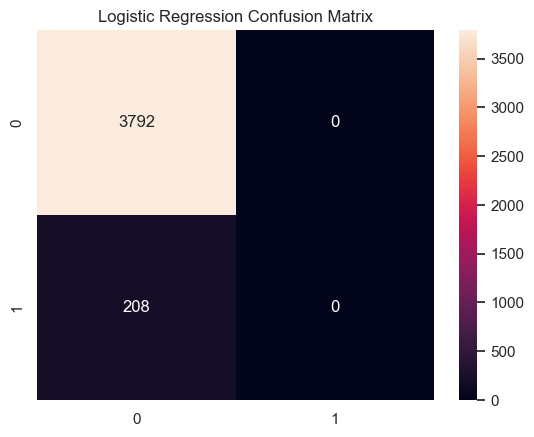

In [22]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log_reg):.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Random Forest

Random Forest Results:
Accuracy: 0.9480
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000


/opt/anaconda3/envs/predictive_maintenance/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


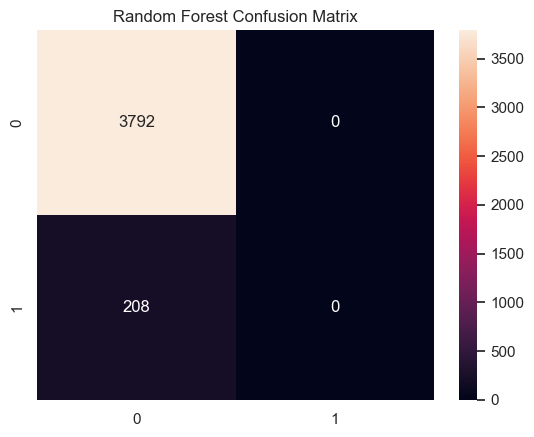

In [23]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf):.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

#### XGBoost

XGBoost Results:
Accuracy: 0.9470
Precision: 0.3571
Recall: 0.0240
F1-score: 0.0450
ROC AUC: 0.5108


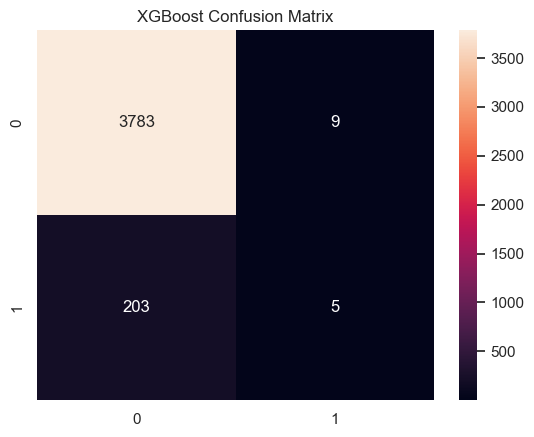

In [24]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(X_test_scaled)

print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_xgb):.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

### 5. Prediction

In [25]:
# Load the prediction set
predict_df = pd.read_csv('sample_data/predict_set.csv')

# Preprocess the prediction set
predict_df['timestamp'] = pd.to_datetime(predict_df['timestamp'])
predict_df = pd.merge(predict_df, vehicle_info_df, on='truck_id', how='left')

# Feature Engineering for prediction set
predict_df = predict_df.sort_values(by=['truck_id', 'timestamp'])

for col in sensor_cols:
    predict_df[f'{col}_rolling_avg'] = predict_df.groupby('truck_id')[col].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

driver_behavior_dummies_pred = pd.get_dummies(predict_df['event'], prefix='event')
predict_df = pd.concat([predict_df, driver_behavior_dummies_pred], axis=1)

# Data Cleaning for prediction set
predict_df.drop(['event'], axis=1, inplace=True)
predict_df.fillna(0, inplace=True)

# One-hot encoding for prediction set
predict_df = pd.get_dummies(predict_df, columns=['model'], drop_first=True)

# Align columns with the training data
predict_X = predict_df[X.columns]

# Scale the prediction set
predict_X_scaled = scaler.transform(predict_X)

# Make predictions
predictions = xgb_clf.predict(predict_X_scaled)
prediction_probas = xgb_clf.predict_proba(predict_X_scaled)

# Display the predictions
predict_df['failure_prediction'] = predictions
predict_df['failure_probability'] = prediction_probas[:, 1]

print("Predictions on the prediction set:")
display(predict_df[['truck_id', 'timestamp', 'failure_prediction', 'failure_probability']])

Predictions on the prediction set:


,truck_id,timestamp,failure_prediction,failure_probability
4,TRUCK_000,2025-09-14 16:16:05.614519,0,0.035722
17,TRUCK_000,2025-09-17 01:43:08.525298,0,0.213700
79,TRUCK_000,2025-09-27 00:34:33.000497,0,0.104614
67,TRUCK_000,2025-10-09 16:25:59.218064,0,0.003380
38,TRUCK_001,2025-09-19 18:54:59.055372,0,0.058694
...,...,...,...,...
88,TRUCK_046,2025-09-24 19:48:58.787358,0,0.039103
5,TRUCK_047,2025-10-11 09:02:23.340010,0,0.002347
24,TRUCK_048,2025-09-26 04:30:09.854733,0,0.001281
94,TRUCK_049,2025-09-28 22:04:07.604487,0,0.000729
